In [2]:
import scipy as sp
import numpy as np
from scipy.constants import h, c, Boltzmann as k_b, sigma, G, pi
from astropy.constants import M_sun, m_p, sigma_T, b_wien
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
M_sun = M_sun.value
m_p = m_p.value
sigma_T = sigma_T.value
b_wien = b_wien.value

In [26]:
# Parameters: T_s, R_in

M = 4e6 * M_sun # Mass of black hole
R_s = 2*G*M/(c**2) # Schwarschild Radius

R_in = 3*R_s # Innermost stable orbit

edd = 4*pi*G*M*m_p*c/sigma_T # Eddington Luminosity
M_dot_E = 8*pi*R_in*m_p*c/sigma_T# accretion rate at Eddington limit

p = 0.5 # fraction of Eddington accretion rate
M_dot = p*M_dot_E
T_s = (3*G*M*M_dot/(8*pi*sigma*(R_in**3)))**(1./4.)
print(np.log10(T_s))


5.731431126694747


In [5]:
lam_max = b_wien/T_s
nu_max = c/lam_max
print(nu_max, k_b*T_s/h) # To understand frequency range

5.574265172759384e+16 1.1226861885916992e+16


In [6]:
nu_lim = np.log10(1e1*k_b*T_s/h)
r_lim = 1e2
print(nu_lim, r_lim)

17.050258379940438 100.0


Text(0, 0.5, 'T_eff(r)')

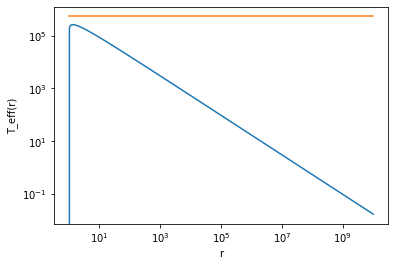

In [7]:
# Useful functions
def planck_spectrum_(nu, T):
    if np.exp(1e1)*h*nu/k_b < T:
        return 2*(nu**2)*k_b*T/(c**2)
    if h*nu/k_b > np.log(1e100)*T:
        return 0
    a = h*nu/(k_b*T)
    exp_term = (c**2)*(np.exp(a) - 1)
    return 2*h*(nu**3)/exp_term

planck_spectrum = np.vectorize(planck_spectrum_)

def T_eff(r, T_s):
    #return T_s * (r**(-3/4))
    return T_s * (r**(-3) - r**(-7/2))**(1/4)

# Test
r = np.logspace(0, 0.1*r_lim, 500)
plt.plot(r, T_eff(r, T_s))
plt.xscale("log")
plt.yscale("log")
plt.plot(r, T_s + r*0)
plt.xlabel("r")
plt.ylabel("T_eff(r)")


Text(0, 0.5, 'B_nu')

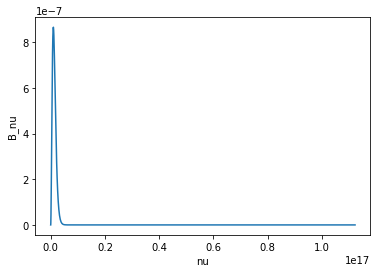

In [16]:
# Test
nu = np.logspace(0, nu_lim, 500)
plt.plot(nu, planck_spectrum(nu, T_eff(r_lim, T_s)))
#plt.xscale("log")
#plt.yscale("log")

plt.xlabel("nu")
plt.ylabel("B_nu")

Text(0, 0.5, 'B')

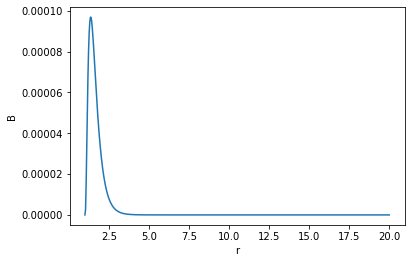

In [23]:
# Test
r = np.linspace(1 + 1e-5, 0.2*r_lim, 500)
plt.plot(r, planck_spectrum(nu_max, T_eff(r, T_s)))
#plt.xscale("log")
#plt.yscale("log")

plt.xlabel("r")
plt.ylabel("B")

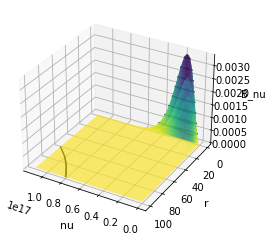

In [10]:
# Test and plot

x = np.linspace(1e12, 10**nu_lim, 200)
y = np.linspace(1 + 1e-5, r_lim, 200)
nu, r = np.meshgrid(x, y)
Z = planck_spectrum(nu, T_eff(r, T_s))

ax = plt.axes(projection='3d')
ax.plot_surface(nu, r, Z, rstride=1, cstride=1,cmap='viridis_r', edgecolor = 'none')
ax.contour(nu, r, Z, 10, colors="k", linestyles="solid")

ax.set_xlabel('nu', fontsize = 11)
ax.set_ylabel('r', fontsize = 11)
ax.set_zlabel('B_nu', fontsize = 10)

ax.azim = 120
ax.dist = 10
ax.elev = 30

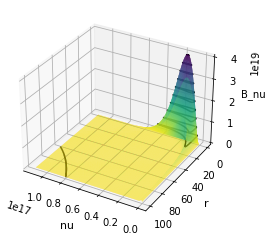

In [11]:
# Good nu plot limit is nu >> k_b*T_in/h 
integrand = lambda nu, r: 2*pi*(R_in**2)*r*planck_spectrum(nu, T_eff(r, T_s))

x = np.linspace(1e12, 10**nu_lim, 500)
y = np.linspace(1 + 1e-5, r_lim, 500)
nu, r = np.meshgrid(x, y)
Z = integrand(nu, r)

ax = plt.axes(projection='3d')
ax.plot_surface(nu, r, Z, rstride=1, cstride=1,cmap='viridis_r', edgecolor = 'none')
ax.contour(nu, r, Z, 10, colors="k", linestyles="solid")

ax.set_xlabel('nu', fontsize = 11)
ax.set_ylabel('r', fontsize = 11)
ax.set_zlabel('B_nu', fontsize = 10)

ax.azim = 120
ax.dist = 10
ax.elev = 30

In [20]:
def luminosity(nu):
    return integrate.quad(integrand, 1 + 1e-5, r_lim, args=(nu))[0]

vec_luminosity = np.vectorize(luminosity)

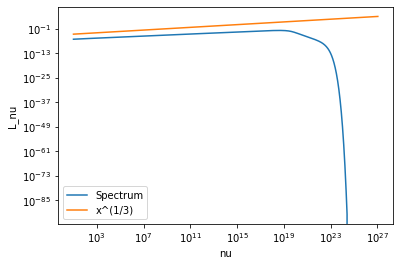

In [21]:
nu = np.logspace(1, nu_lim+10, 1000)

plt.xscale('log')
plt.yscale('log')
plt.plot(nu, vec_luminosity(nu), label="Spectrum")
plt.plot(nu, 1e-4*nu**(1/3), label = "x^(1/3)")
plt.xlabel("nu")    
plt.ylabel("L_nu")
plt.legend()

[[6.17715615e-14 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.41274548e-13 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.89456409e-13 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.01930308e-12 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.02141440e-12 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.02352250e-12 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


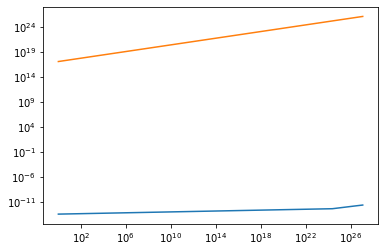

In [27]:
x = np.linspace(1, 10**(nu_lim+10), 500)
y = np.linspace(1 + 1e-5, r_lim, 500)
nu, r = np.meshgrid(x, y)
Z = integrand(nu, r)

print(Z)

#ax = plt.axes(projection='3d')
#ax.plot_surface(nu, r, Z, rstride=1, cstride=1,cmap='viridis_r', edgecolor = 'none')

res = []
for i in range(len(nu)):
    res.append(integrate.trapezoid(Z[i]))


plt.plot(x, np.array(res))
plt.xscale("log")
plt.yscale("log")
plt.plot(x, 1e17*x**(1/3), label = "x^(1/3)")
#plt.plot(x, 1e19*x**(2), label = "x^(1/3)")

